In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
AON = pd.read_csv("AON.csv")
EQIX = pd.read_csv("EQIX.csv")
ETN = pd.read_csv("ETN.csv")
NDSN = pd.read_csv("NDSN.csv")



In [94]:
companies = {"AON": AON, "EQIX": EQIX, "ETN": ETN, "NDSN": NDSN}

In [95]:
for df in companies.values():
    df["Date"] = pd.to_datetime(df["Date"])
    print(df.Date.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [96]:
#1
for company, df in companies.items():
    if sum(df["High"] == df["Low"]) == df.shape[0]:
            print(f"the company {company} has no difference between Close and Adj price")
    else:
            print("No diff")


No diff
No diff
No diff
No diff


In [97]:
#2
for company, data in companies.items():
    print(f"Company {company} has minimum {data["High"].min()}")
    print(f"Company {company} has maximum {data["High"].max()}")


Company AON has minimum 104.294
Company AON has maximum 334.702
Company EQIX has minimum 310.277
Company EQIX has maximum 832.226
Company ETN has minimum 56.553
Company ETN has maximum 166.805
Company NDSN has minimum 101.514
Company NDSN has maximum 263.808


In [98]:
#3
for company, data in companies.items():
    data["logreturns"] = np.log(data["Close"]) - np.log(data["Close"].shift(1))
    print(f"for company {company} the min Log Return is {data["logreturns"].min()}")
    print(f"for company {company} the max Log Return is {data["logreturns"].max()}")
    print(f"for company {company} the mean Log Return is {np.mean(data["logreturns"])}")
    print(f"for company {company} the standard distribution of Log Return is {data["logreturns"].std()}")
    print(f"for company {company} the skewness of Log Return is {data["logreturns"].skew()}")

for company AON the min Log Return is -0.18275802270452512
for company AON the max Log Return is 0.1321884407077425
for company AON the mean Log Return is 0.0006916652164545901
for company AON the standard distribution of Log Return is 0.01575849165849368
for company AON the skewness of Log Return is -0.6721942079553415
for company EQIX the min Log Return is -0.13541781382417106
for company EQIX the max Log Return is 0.10976855137481234
for company EQIX the mean Log Return is 0.0004720099132137384
for company EQIX the standard distribution of Log Return is 0.017962422891255405
for company EQIX the skewness of Log Return is -0.09146398131490188
for company ETN the min Log Return is -0.12748092473568118
for company ETN the max Log Return is 0.20915762810160166
for company ETN the mean Log Return is 0.0006467316290610952
for company ETN the standard distribution of Log Return is 0.01840984978940037
for company ETN the skewness of Log Return is 0.3316060368919239
for company NDSN the min L

In [99]:
#4

for company, data in companies.items():
    sorted_r = data.sort_values("logreturns")
    sec_low = sorted_r.iloc[1]
    sec_high = sorted_r.iloc[-2]
    print(f"{company} Had second lowest on {sec_low['Date']}, second highest on {sec_high['Date']}")



AON Had second lowest on 2022-04-29 00:00:00, second highest on 2020-03-24 00:00:00
EQIX Had second lowest on 2022-05-09 00:00:00, second highest on 2020-03-24 00:00:00
ETN Had second lowest on 2020-03-23 00:00:00, second highest on 2020-03-24 00:00:00
NDSN Had second lowest on 2020-03-12 00:00:00, second highest on 2020-03-24 00:00:00


In [100]:
#5

for company, data in companies.items():
    data = data.set_index("Date", inplace=True)
    median_week = data["Volume"].resample("W").median().median()
    print(f"Company {company} has {median_week}")


TypeError: 'NoneType' object is not subscriptable

In [ ]:
#6
total_returns = {}
for company, data in companies.items():
    ret = data["logreturns"].iloc[-1] - data["logreturns"].iloc[0]
    total_returns[company] = ret

lowest = min(total_returns, key=total_returns.get)
print(f"Lowest total return: {lowest} = {total_returns[lowest]}")


Lowest total return: AON = nan


In [ ]:
#7
data_low = data[data["Volume"] >= 0.33]
data_medium = data[(data["Volume"] > 0.33 ) & (data["Volume"] <= 0.67)] 
data_high = data[data["Volume"] > 0.67]

data

Text(0.5, 1.0, 'Distribution of Log Returns')

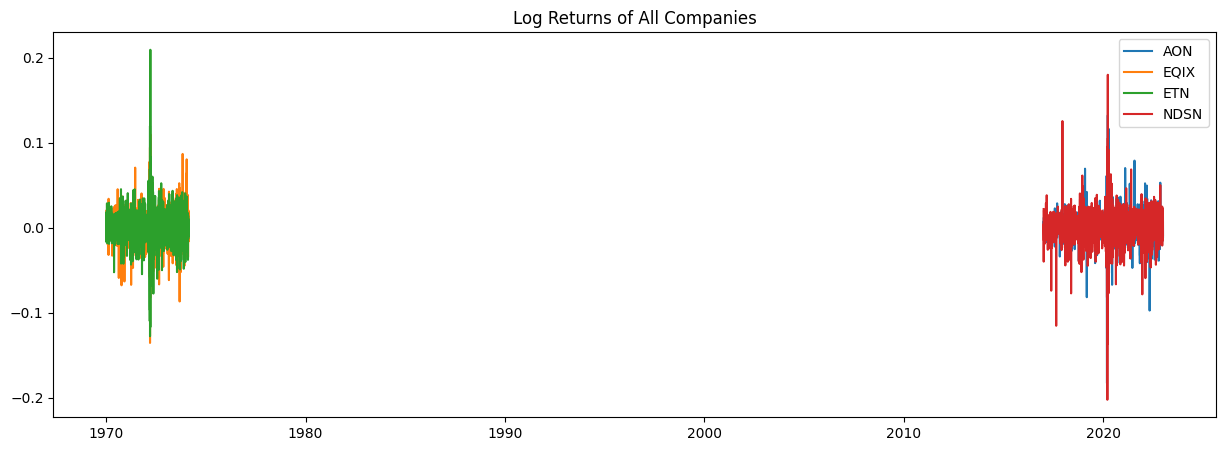

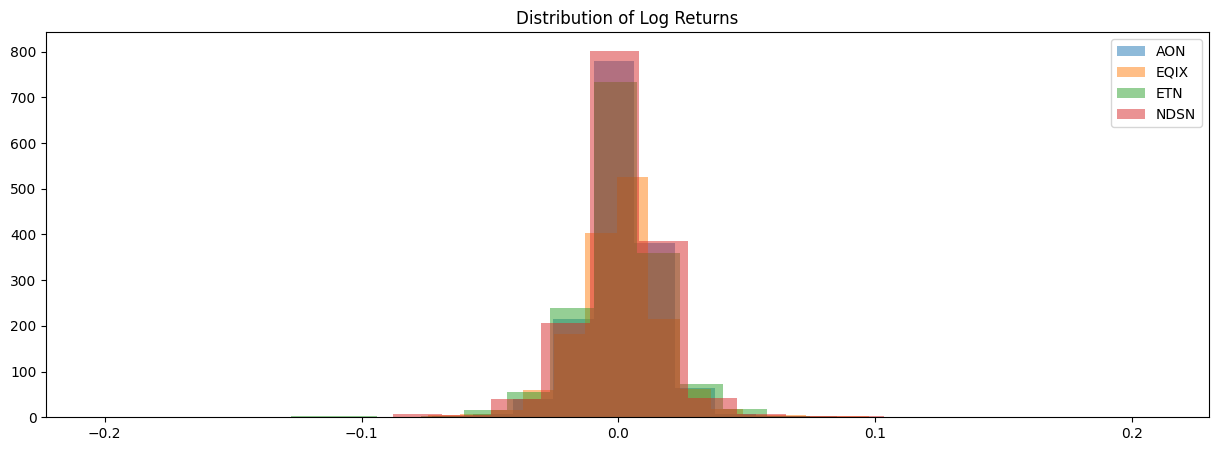

In [ ]:
#8
plt.figure(figsize=(15,5))
for company, data in companies.items():
    plt.plot(data["logreturns"], label=company)
plt.legend()
plt.title("Log Returns of All Companies")

plt.figure(figsize=(15,5))
for company, data in companies.items():
    plt.hist(data["logreturns"], bins=20, alpha=0.5, label=company)
plt.legend()
plt.title("Distribution of Log Returns")
